In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mplleaflet

# Plot Route

In [2]:
# create dataframe
lats = [41.1171, 40.8518, 41.9028, 43.7696, 44.4949, 45.4408]
longs = [16.8719, 14.2681, 12.4964, 11.2558, 11.3426, 12.3155]
cities = ["Bari", "Napoli", "Roma", "Firenze", "Bologna", "Venezia"]

data_df = pd.DataFrame({"latitude": lats, "longitude": longs, "cities": cities})
print(data_df)

# create plot
line_plot_fig, line_plot_ax = plt.subplots(figsize=(10, 7))
line_plot_ax.plot(data_df.longitude, data_df.latitude, 'green', linewidth=3)
line_plot_ax.plot(data_df.longitude, data_df.latitude, 'ks')

# show leaflet map with matplotlib plot(s)
# mplleaflet.display(fig=line_plot_fig)
mplleaflet.save_html(fig=line_plot_fig, fileobj='01_mplleaflet_geopandas.html')

   latitude  longitude   cities
0   41.1171    16.8719     Bari
1   40.8518    14.2681   Napoli
2   41.9028    12.4964     Roma
3   43.7696    11.2558  Firenze
4   44.4949    11.3426  Bologna
5   45.4408    12.3155  Venezia


https://endlesspython.github.io/data-visualization/mplleaflet-tutorials/01_mplleaflet_geopandas.html

# Plot Locations

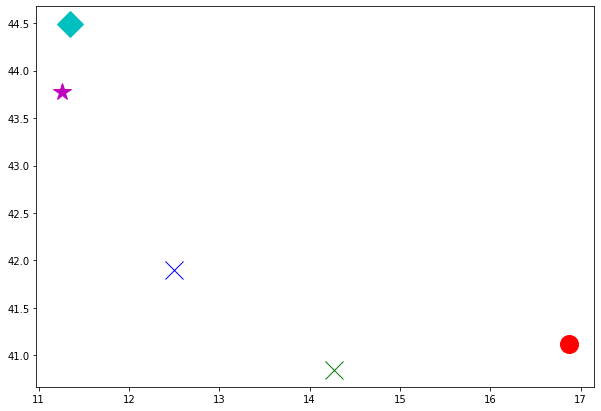

In [3]:
plot_locs_fig, plot_locs_ax = plt.subplots(figsize=(10, 7))
plot_locs_ax.plot(longs[0], lats[0], 'ro', markersize=18)
plot_locs_ax.plot(longs[1], lats[1], 'gx', markersize=18)
plot_locs_ax.plot(longs[2], lats[2], 'bx', markersize=18)
plot_locs_ax.plot(longs[3], lats[3], 'm*', markersize=18)
plot_locs_ax.plot(longs[4], lats[4], 'cD', markersize=18)

# mplleaflet.display(fig=plot_locs_fig)

# Scatter Plot

In [4]:
# append some more data to our dataframe
annual_boardings = [5000000, 10000000, 50000000, 30000000, 15000000, 40000000]
population = [324198, 3085000, 2873000, 382258, 388367, 261905]
data_df["annual_boardings"] = annual_boardings
data_df["population"] = population

print(data_df)

   latitude  longitude   cities  annual_boardings  population
0   41.1171    16.8719     Bari           5000000      324198
1   40.8518    14.2681   Napoli          10000000     3085000
2   41.9028    12.4964     Roma          50000000     2873000
3   43.7696    11.2558  Firenze          30000000      382258
4   44.4949    11.3426  Bologna          15000000      388367
5   45.4408    12.3155  Venezia          40000000      261905


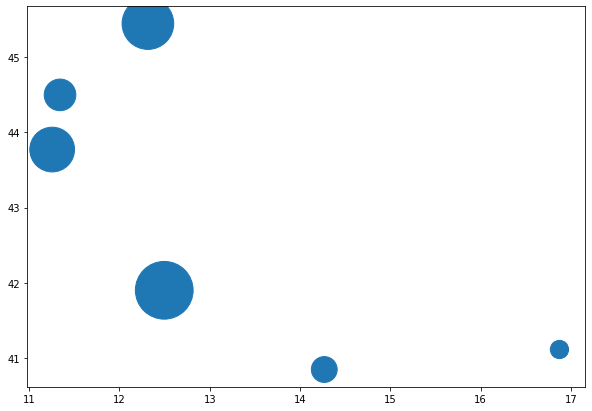

In [5]:
# create scatterplot
airports_fig, airports_ax = plt.subplots(figsize=(10, 7))
airports_scatter = airports_ax.scatter(
    x=data_df["longitude"],
    y=data_df["latitude"],
    s=data_df["annual_boardings"]/15000
)
# mplleaflet.display(fig=airports_fig)

# GeoDataFrame Layer Using GeoPandas  
  
https://geopandas.org/en/stable/gallery/plotting_basemap_background.html

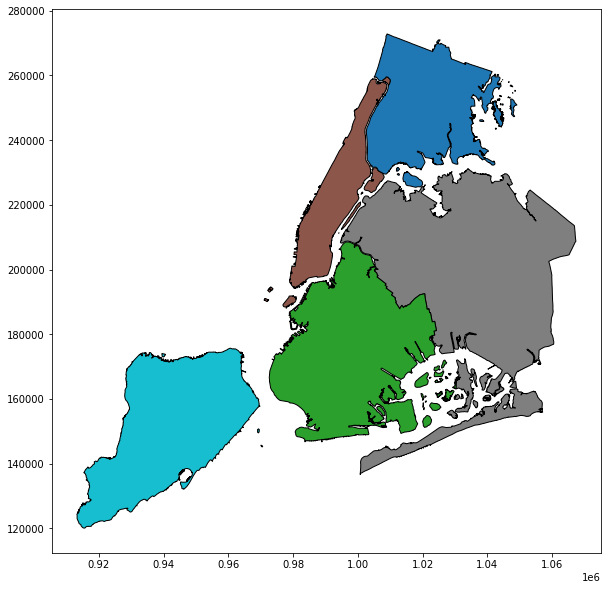

In [6]:
import geopandas

# dataframe
ny_df = geopandas.read_file(geopandas.datasets.get_path('nybb'))

# plot (generate a plot of a GeoDataFrame with matplotlib)
ny_ax = ny_df.plot(column='BoroName', figsize=(10, 10), alpha=1.0, edgecolor='k')

In [7]:
ny_df.plot?

Signature:      ny_df.plot(*args, **kwargs)
Type:           GeoplotAccessor
String form:    <geopandas.plotting.GeoplotAccessor object at 0x7fc14b56c6a0>
File:           ~/Desktop/notonlypyton/data-visualization/.venv/lib/python3.8/site-packages/geopandas/plotting.py
Docstring:     
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
column : str, np.array, pd.Series (default None)
    The name of the dataframe column, np.array, or pd.Series to be plotted.
    If np.array or pd.Series are used then it must have same length as
    dataframe. Values are used to color the plot. Ignored if `color` is
    also set.
kind: str
    The kind of plots to produce:
     - 'geo': Map (default)
     Pandas Kinds
     - 'line' : line plot
     - 'bar' : vertical bar plot
     - 'barh' : horizontal bar plot
     - 'hist' : histogram
     - 'box' : BoxPlot
     - 'kde' : Kern

In [8]:
ny_df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [9]:
# print(ny_df.crs)

# show leaflet map with matplotlib plot(s)
# mplleaflet.display(fig=ny_ax.figure, crs=ny_df.crs)

# crs=Coordinate Reference Systems
# about CRS: https://geobgu.xyz/py/geopandas1.html